# Partial Differential Equations, " Analytical and Numerical Methods".

This is a course work that looks into Partial Differential Equations. I will evaluate solutions and plot graphs. Topics that I will focus on the analysis and computations are:

1. Boundary Value Problems in Statics

2. Heat Flow and Diffusion

3. Waves

# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
import scipy.integrate as integrate
import sympy as sm

pi = np.pi

# Section 5: Boundary Value Problem in Statics

# 5.6: Piecewise Polynomials and The Finite Element Method

# Exercise 5.6.8

Using a uniform mesh with four elements, compute the piecewise linear finite element approximation to the solution of:
\begin{equation}
-\frac{\partial^2 u}{\partial x^2} + u = x,  0 < x <l, \\
u(0) = 0 \\
u(l) = 0.
\end{equation}
Compute the exact solution and compare with the approximation solution

# Solution

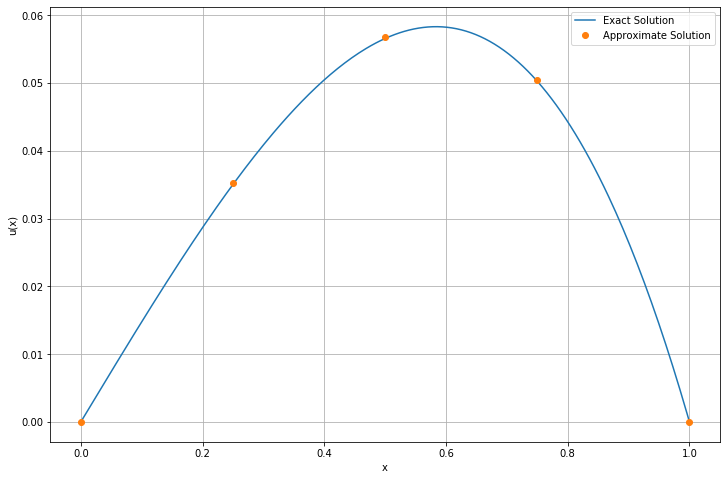

In [2]:
# ID the exact solution
xex = np.linspace(0, 1, 2**8+1)
uex = -(1/np.sinh(1))*np.sinh(xex) + xex

# Initialize spatial variable x and function u
n = 4
h = 1./n
x = np.linspace(0, 1, n+1)
u = np.zeros([n+1])

# Construct stiffness matrix and load vector
K = np.zeros([n-1, n-1])
f = np.zeros([n-1])
for i in range(n-1):
    K[i][i] = (2/h + 2/3*h)
for i in range(n-2):
    K[i][i+1] = (-1/h + 1/6*h)
    K[i+1][i] = (-1/h + 1/6*h)

f = x[1:n]*h
u[1:n] = la.solve(K, f)

# Do some plotting
plt.figure(figsize = (12, 8))
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend
plt.plot(xex, uex, label='Exact Solution')
plt.plot(x, u, "o", label='Approximate Solution')
plt.grid()
plt.legend(loc='upper right')
plt.show()

# Section 6: Heat Flow and Diffusion

# 6.1: Fourier Series Methods for the Heat Equation

# 6.1.1: The Homogeneous Heat Equation

# Example 6.1.1

We consider a $50cm$ iron bar, with specific heat $c = 0.437J/(gK)$, density $\rho = 7.88g/cm^3$, and thermal conductivity $\kappa = 0.836W/(cmK)$. We assume that the bar is insulated expect at the ends and that it is (somehow) given the initial temperature
\begin{equation}
\psi(x) = 5 - \frac{1}{5}|x-25|,
\end{equation}

where $\psi(x)$ is given in degrees Celcius. Finally, we assume that, at time $t=0$, the ends of the bar are placed in an ice bath (0 degrees Celcius). We will compute the temperature distribution after $20$, $60$, and $300$ seconds.

We must solve the IBVP
\begin{equation}
\rho cc\frac{\partial u}{\partial t} - k\frac{\partial^2 u}{\partial x^2} = 0, 0 < x < 50, t > 0, \\
u(x,0) = \psi(x), 0 < x < 50, \\
u(0,t) = 0, t > 0, \\
u(50,t) = 0, t > 0.
\end{equation}

# Solution

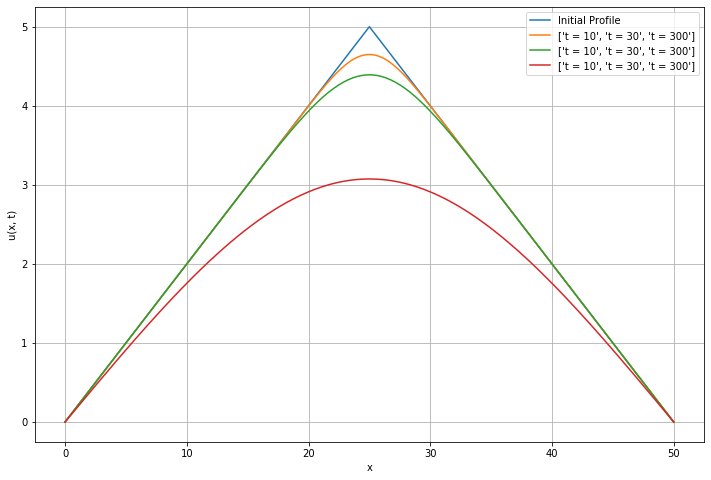

In [3]:
# Initialize spatial variable x and function u
Nx = 2**8
dx = 50./Nx
x = np.linspace(0, 50, Nx+1)
u = np.zeros((Nx+1, 4))

# Set the constants
c = 0.437
rho = 7.88
kappa = 0.836

# We approximate the solution at three distinct time steps
trange = [10, 30, 300]

# ID the initial profile
kt = 0;
u[:,kt] = 5 - np.abs(x-25)/5

# Truncated sum of Fourier series for each time step
NF = 20 
for t in trange:
    kt += 1
    for n in range(1,NF):
        alpha = n*pi/50
        lam = alpha**2
        bn = 40/(n*pi)**2*np.sin(n*pi/2)
        an = bn*np.exp(-lam*kappa/(rho*c)*t)
        psi = np.sin(alpha*x)
        u[:,kt] += an*psi

plt.figure(figsize = (12, 8))
plt.xlabel('x')
plt.ylabel('u(x, t)')
plt.legend
plt.plot(x, u[:,0], label='Initial Profile')
plt.plot(x, u[:,1:4], label=['t = 10', 't = 30', 't = 300'])
plt.grid()
plt.legend(loc='upper right')
plt.show()

# 6.2 : Pure Neumann Conditions and the Fourier Cosine Series

# 6.2.1 One end insluated; mixed boundary conditions

# Example 6.4

We consider the temperature distribution in the iron bar of example $6.1$, with the experiement conditions unchanged except that the right end ($x=l$) of the bar is perfectly insulated. The temperature distribution $u(x,)$ then satisfies the IBVP
\begin{equation}
\rho c\frac{\partial u}{\partial t} - \kappa \frac{\partial^2 u}{\partial x^2} = 0,  0 < x < l, t > 0\\
u(x,\,0) = \psi(x), 0 < x < l\\
u(0,\,t) = 0, t > 0\\
\frac{\partial u}{\partial x}(l,\,t) = 0, t > 0
\end{equation}
for $l = 50 cm$, $c = 0.437 J/(gK)$, $\rho = 7.88 g/cm^3$,  $\kappa = 0.836 W/(cm K)$, and 
\begin{equation}
\psi(x) = 5 - \frac{1}{5}|x-25|.
\end{equation}.  

# Solution

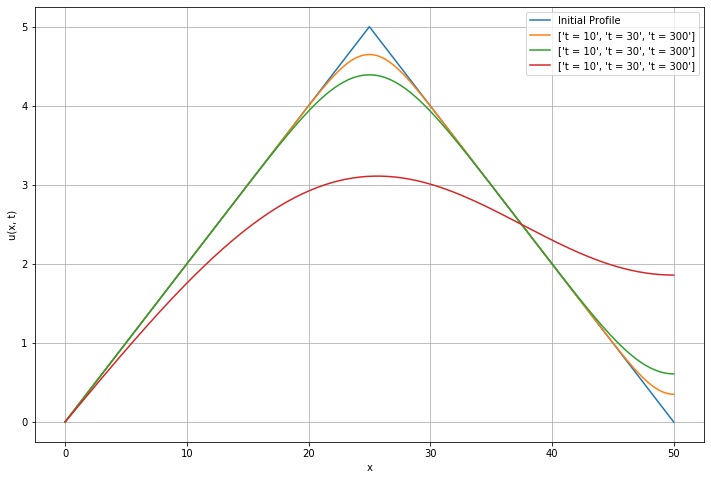

In [4]:
import numpy as np
import matplotlib.pyplot as plt
pi = np.pi

# Initialize spatial variable x and function u
Nx = 2**8
dx = 50./Nx
x = np.linspace(0, 50, Nx+1)
u = np.zeros((Nx+1, 4))

# Set the constants
c = 0.437
rho = 7.88
kappa = 0.836

# We approximate the solution at three distinct time steps
trange = [10, 30, 300]

# ID the initial profile
kt = 0;
u[:,kt] = 5 - np.abs(x-25)/5

# Truncated sum of Fourier series for each time step
NF = 20 
for t in trange:
    kt += 1
    for n in range(1,NF):
        alpha = (2*n - 1)*pi/(2*50)
        lam = alpha**2
        bn = 1/(125*alpha**2)*( (-1)**n - np.sqrt(2)*np.cos(n*pi/2) + np.sqrt(2)*np.sin(n*pi/2))
        an = bn*np.exp(-lam*kappa/(rho*c)*t)
        psi = np.sin(alpha*x)
        u[:,kt] += an*psi

plt.figure(figsize = (12, 8))
plt.xlabel('x')
plt.ylabel('u(x, t)')
plt.legend
plt.plot(x, u[:,0], label='Initial Profile')
plt.plot(x, u[:,1:4], label=['t = 10', 't = 30', 't = 300'])
plt.grid()
plt.legend(loc='upper right')
plt.show()

# 6.3 : Periodic boundary conditions and the full Fourier Series

# Exercise 6.3.4

Consinder a ring, $5cm$ in radius, made of lead (which has physical properties $\rho = 11.3 g/cm^3$, $c = 0.129 J/(gK)$, $k = 0.353 W/(cmK)$). Suppose the temperature is a constant $25$ degrees Celcius, and an (uneven) heat source is applied to the ring. If the heat source delivers heat energy to the ring at a rate of 
\begin{equation}
f(x) = 1 - \frac{|x|}{5\pi} W/cm^3 \\
\end{equation},
how long does it take for the temperature at the hottest part of the ring to reach $30$ degrees Celcius?

# Solution

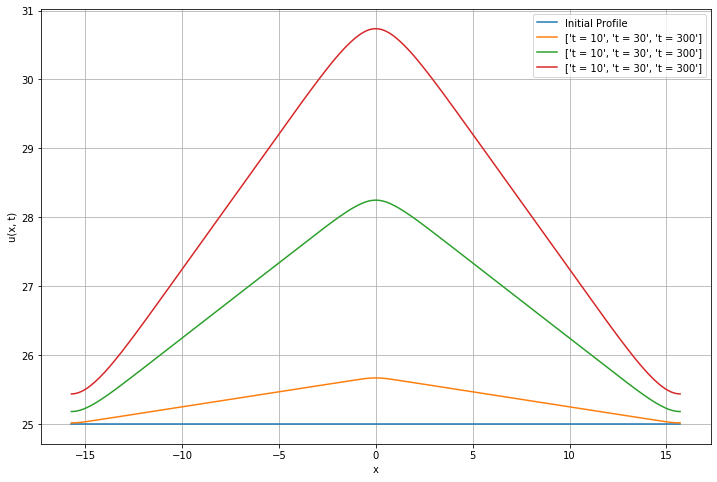

In [5]:
# Initialize spatial variable x and function u
Nx = 2**8
dx = 10*pi/Nx
x = np.linspace(-5*pi, 5*pi, Nx+1)
u = np.zeros((Nx+1, 4))

# Set the constants
c = 0.129
rho = 11.3
kappa = 0.353

# We approximate the solution at three distinct time steps
trange = [1.0,5.0, 9]

# ID the initial profile
kt = 0;
u[:,kt] = 25*np.ones(len(x))

# Truncated sum of Fourier series for each time step
NF = 20 
for t in trange:
    kt += 1
    co = 1./2
    a0 = ((co/(rho *c))*t+25)*np.ones(len(x))
    u[:,kt] = a0
    for n in range(1,NF):
        alpha = n*pi/(5*pi)
        lam = alpha**2
        cn = (-10*((-1)**n - 1))/((pi* n)**2*5)
        bn = 0
        an = cn/(kappa*lam)*(1- np.exp(-(kappa*lam/(rho*c)*t)))
        psi = np.cos(alpha*x)
        u[:,kt] += an*psi

plt.figure(figsize = (12, 8))
plt.xlabel('x')
plt.ylabel('u(x, t)')
plt.legend
plt.plot(x, u[:,0], label='Initial Profile')
plt.plot(x, u[:,1:4], label=['t = 10', 't = 30', 't = 300'])
plt.grid()
plt.legend(loc='upper right')
plt.show()

# 6.4 : Finte Element Methods for the Heat Equations

# Exercise 6.4 2b

Consider a function $f$ in $C[0,l]$.

a) Show how to compute the projection of $f$ onto the subspace $S_n$. Be sure to observe how the mass matrix $M$ and load vector $f$ arise naturaaly in this problem.

b) We can also find  an approximation to $f$ from $S_n$ by computing the piecewise linear interpolant of $f$. Show by a specific example that the projection of $f$ onto $S_n$ and the piecewise linear interpolant of $f$ from $S_n$ are not the same. (The number $n$ can be chosen small to make the computation simple.)

# Solution

[ 0.          0.09416268 -0.37665072  1.41244019 -0.35311005  0.        ]


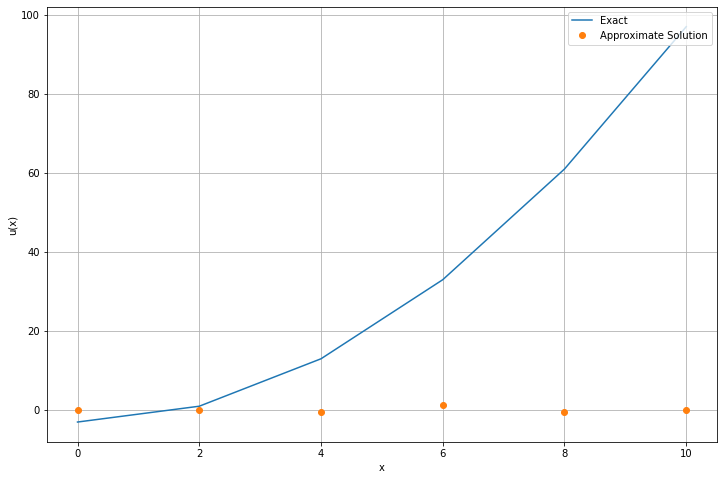

In [6]:
n = 5
l=3
h = l/n
x = np.linspace(0, 10, n+1)
u = np.zeros([n+1])

# function
F = (x**2-l)

# Construct stiffness matrix and load vector
K = np.zeros([n-1, n-1])
f = np.zeros([n-1])
for i in range(n-1):
    K[i][i] = (2/3) * h
for i in range(n-2):
    K[i][i+1] = (1./6) * h
    K[i+1][i] = (1./6) * h
f[i] = h*((i**2-l)-(1/2) * h**2)

u[1:n] = la.solve(K, f)
print(u)
# Do some plotting
plt.figure(figsize = (12, 8))
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend
plt.plot(x, F,label='Exact')
plt.plot(x, u, "o", label='Approximate Solution')
plt.grid()
plt.legend(loc='upper right')
plt.show()

# 6.5 : Finite Elements and Neumann Conditions

# Exercise 6.5.1

Consider an aluminum bar of length $1m$ and radius $1cm$. Suppose that the sides and ends of the bar are perfectly insulated, and heat energy is added to the interior of the bar at a rate of 
\begin{equation}
f(x) = 10^{-7}x(25-x)(100-x) + \frac{1}{240} W/cm^3
\end{equation}
(x is given in centimeters, and the usual coordinate system is used). The thermal conductivity of the aluminum alloy is $1.5W/(cmK)$. Find and graph the steady-state temperature of the bar. Use the finite element method.

# Solution

We calculate $K$, where $n=4$

$K_{00} = a(\phi_0, \phi_0) = \int_{0}^{100} 1.5 \phi_{0}'\phi_{0}' \partial x = \int_{0}^{h} (\frac{1}{h^2}) \partial x $

$K_{11} = a(\phi_1, \phi_1) = \int_{0}^{100}  \phi_{1}'\phi_{1}' \partial x = \int_{(i-1)h}^{(i+1)h} (\frac{1}{h^2}) \partial x$

.     .     .      .      .     

.     .     .      .      .

.     .     .      .      .

.     .     .      .      .

.     .     .      .      .

$K_{44} = a(\phi_4, \phi_4) = \int_{0}^{100} \phi_{4}'\phi_{4}' \partial x = \int_{1-h}^{1} (\frac{1}{h^2}) \partial x$ 

$K_{12} = a(\phi_2, \phi_1) = \int_{0}^{100} \phi_{1}'\phi_{2}' \partial x = \int_{ih}^{(i+1)h} (-\frac{1}{h^2}) \partial x$

Load vector:

$\vec{f_0} = (f, \phi_0) = \int_{0}^{h} 1.5 * (10^{-7} x (25 - x)(100-x) + \frac{1}{240}) (1-\frac{x}{h}) \partial x$

$\vec{f_1} = (f, \phi_1) = \int_{(i-1)h}^{(i+1)h} 1.5 *  (10^{-7} x (25 - x)(100-x) + \frac{1}{240}) (1-\frac{x-ih}{h})\partial x$

.    .     .     .      .

.    .     .     .      .

.    .     .     .      .

.    .     .     .      .

$\vec{f_4} = (f, \phi_4) = \int_{1}^{1-h} 1.5 * (10^{-7} x (25 - x)(100-x) + \frac{1}{240}) (\frac{x-(1-h)}{h}) \partial x$

[ 5.55555556  5.54646777  5.51778472  5.46782997  5.3955      5.30022515
  5.18193056  5.04099707  4.87822222  4.69478114  4.4921875   4.27225445
  4.03705556  3.78888574  3.53022222  3.26368544  2.992       2.71795562
  2.44436806  2.17404004  1.90972222  1.65407411  1.409625    1.17873492
  0.96355556  0.76599121  0.58765972  0.42985341  0.2935      0.17912359
  0.08680556  0.01614551 -0.03377778 -0.06444542 -0.0779375  -0.07697211
 -0.06494444 -0.04596582 -0.02490278 -0.00741612  0.        ]


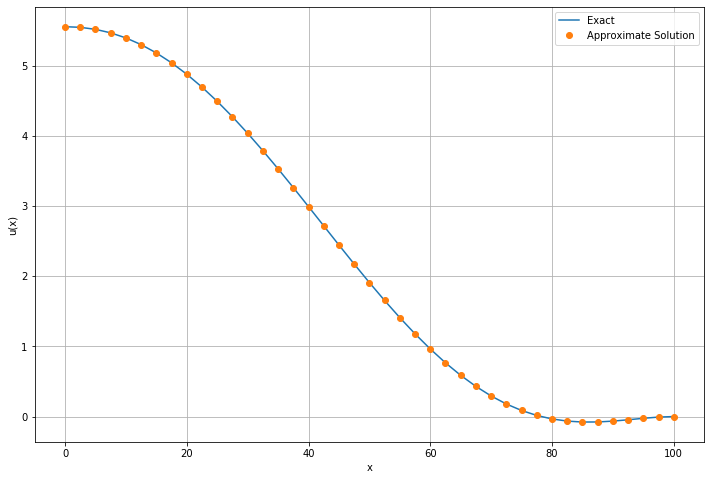

In [7]:
z=sm.Symbol("z")
s=sm.Symbol("s")
t=sm.Symbol("t")
kappa = 1.5

# Initialize spatial variable x and function u
n = 40
h = 100./n
x = np.linspace(0, 100, n+1)
u = np.zeros([n+1])
FF= lambda z:(10**(-7)*z*(25-z)*(100-z)+1./240)/kappa


# Exact solution
uex= lambda z:(sm.integrate(sm.integrate(FF(s), (s, 0, t)), (t, z, 100)))
# Construct stiffness matrix and load vector
K = np.zeros([n, n])
f = np.zeros([n])
mysoln = np.zeros([n+1])
for i in range(n):
    K[i][i] = 2/h
    phim = lambda z: 1/h*(z-(i-1)*h)
    phip = lambda z: -1/h*(z-(i+1)*h)
    f[i] = sm.integrate(FF(z)*phim(z), (z, (i-1)*h, i*h)) + sm.integrate(FF(z)*phip(z), (z, i*h, (i+1)*h))
    mysoln[i] = uex(i*h)
for i in range(n-1):
    K[i][i+1] = -1/h
    K[i+1][i] = -1/h 

K[0][0] = 1/h
f[0] = sm.integrate(FF(z)*(1-z/h),(z,0,h))
#print(K)
#print(f)

u[0:n] = la.solve(K, f)
print(u)
# Do some plotting
plt.figure(figsize = (12, 8))
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend
plt.plot(x, mysoln, label='Exact')
plt.plot(x, u, "o", label='Approximate Solution')
plt.grid()
plt.legend(loc='upper right')
plt.show()

# Exercise 6.5.2

Consider an aluminum bar of length $1m$ and radius $1cm$. Suppose that the sides and ends of the bar are perfectly insulated, and heat energy is added to the interior of the bar at a rate of 
\begin{equation}
f(x) = 10^{-7}x(25-x)(100-x) + \frac{1}{240} W/cm^3
\end{equation}
(x is given in centimeters, and the usual coordinate system is used). The thermal conductivity of the aluminum alloy is 
\begin{equation}
\kappa(x) = 1.0 + (\frac{x}{100})^2
\end{equation}
and we assume that the bar is heterogeneous, with thermal conductivity. Find and graph the steady-state temperature of the bar. Use the finite element method.

# Solution

We calculate $K$, where $n=4$

$K_{00} = a(\phi_0, \phi_0) = \int_{0}^{100} \phi_{0}'\phi_{0}' \partial x = \int_{0}^{h}(\frac{1}{h^2}) \partial x$

$K_{11} = a(\phi_1, \phi_1) = \int_{0}^{100} \phi_{1}'\phi_{1}' \partial x = \int_{(i-1)h}^{(i+1)h}(\frac{1}{h^2}) \partial x$

.     .     .      .      .     

.     .     .      .      .

.     .     .      .      .

.     .     .      .      .

.     .     .      .      .

$K_{44} = a(\phi_4, \phi_4) = \int_{0}^{100} \phi_{4}'\phi_{4}' \partial x = \int_{1-h}^{1} (\frac{1}{h^2}) \partial x$ 

$K_{12} = a(\phi_2, \phi_1) = \int_{0}^{100} \phi_{1}'\phi_{2}' \partial x = \int_{ih}^{(i+1)h}(1+((-\frac{1}{h^2}) \partial x$

Load vector:

$\vec{f_0} = (f, \phi_0) = \int_{0}^{h} (1+(\frac{x}{100})^2 (10^{-7} x (25 - x)(100-x) + \frac{1}{240}) (1-\frac{x}{h})\partial x$

$\vec{f_1} = (f, \phi_1) = \int_{(i-1)h}^{(i+1)h} (1+(\frac{x}{100})^2 (10^{-7} x (25 - x)(100-x) + \frac{1}{240}) (1-\frac{x-ih}{h})\partial x$

.    .     .     .      .

.    .     .     .      .

.    .     .     .      .

.    .     .     .      .

$\vec{f_4} = (f, \phi_4) = \int_{1}^{1-h}(1+(\frac{x}{100})^2 (10^{-7} x (25 - x)(100-x) + \frac{1}{240}) (\frac{x-(1-h)}{h}) \partial x$

[-1.83812775e+66 -1.83812775e+66 -1.83812775e+66 -1.83812775e+66
 -1.83812775e+66 -1.83812775e+66 -1.83812775e+66 -1.83812775e+66
 -1.83812775e+66 -1.83812775e+66 -1.83812775e+66 -1.83812775e+66
 -1.83812775e+66 -1.83812775e+66 -1.83812775e+66 -1.83812775e+66
 -1.83812775e+66 -1.83812775e+66 -1.83812775e+66 -1.83812775e+66
 -1.83812775e+66 -1.83812775e+66 -1.83812775e+66 -1.83812775e+66
 -1.83812775e+66 -1.83812775e+66 -1.83812775e+66 -1.83812775e+66
 -1.83812789e+66 -1.83812754e+66 -1.83812940e+66 -1.83813052e+66
 -1.83810570e+66 -1.83782189e+66 -1.83772676e+66 -1.83837334e+66
 -1.83275789e+66 -1.80080471e+66 -1.67942544e+66 -1.33024663e+66
  0.00000000e+00]


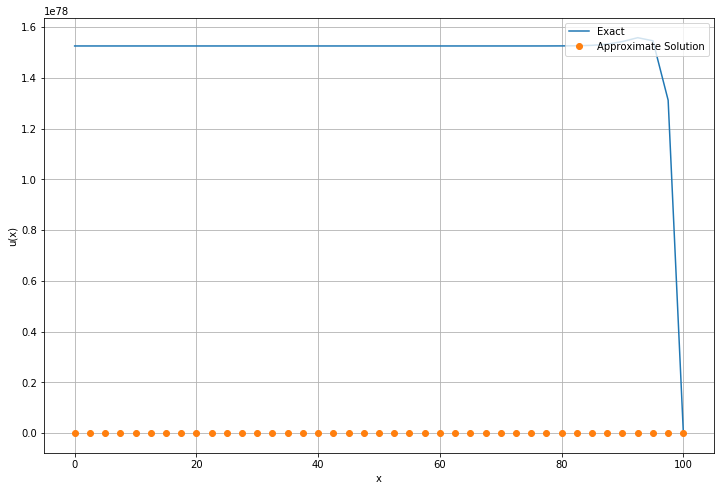

In [8]:
z=sm.Symbol("z")
s=sm.Symbol("s")
t=sm.Symbol("t")
kappa = 1.0 + (x/100)**2

# Initialize spatial variable x and function u
n = 40
h = 100./n
x = np.linspace(0, 100, n+1)
u = np.zeros([n+1])
FF= lambda z:(10**(-7)*z*(25-z)*(100-z)+1./240)/kappa


# Exact solution
uex= lambda z:(sm.integrate(sm.integrate(FF(s), (s, 0, t)), (t, z, 100)))
# Construct stiffness matrix and load vector
K = np.zeros([n, n])
f = np.zeros([n])
mysoln = np.zeros([n+1])
for i in range(n):
    K[i][i] = 2/h
    phim = lambda z: 1/h*(z-(i-1)*h)
    phip = lambda z: -1/h*(z-(i+1)*h)
    f[i] = sm.integrate(FF(z)*phim(z), (z, (i-1)*h, i*h)) + sm.integrate(FF(z)*phip(z), (z, i*h, (i+1)*h))
    mysoln[i] = uex(i*h)
for i in range(n-1):
    K[i][i+1] = -1/h
    K[i+1][i] = -1/h 

K[0][0] = 1/h
f[0] = sm.integrate(FF(z)*(1-z/h),(z,0,h))
#print(K)
#print(f)

u[0:n] = la.solve(K, f)
print(u)
# Do some plotting
plt.figure(figsize = (12, 8))
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend
plt.plot(x, mysoln, label='Exact')
plt.plot(x, u, "o", label='Approximate Solution')
plt.grid()
plt.legend(loc='upper right')
plt.show()

# Section 7: Waves

# 7.2 Fourier Series Methods for the Wave Equation

# 7.2.2 : Fourier series solutions of the inhomogeneous wave equation

# Example 7.4

Consider a metal ring, such as a guiter string, that can be attracted by a magnet. Suppose the string in question is $25cm$ in length, with $c = 2500cm/s$ in the wave equation, its ends are fixed, and it is "plucked" so that its initial displacement is 
\begin{equation}
\psi(x) = \frac{1}{10}(1-\frac{2}{25}|x-\frac{25}{2}|))
\end{equation}
and released (so that it's initial velocity is zero). Suppose further that a magnet exterts a constant upward force of $1000 dynes$. We wish to find the motion of the string.

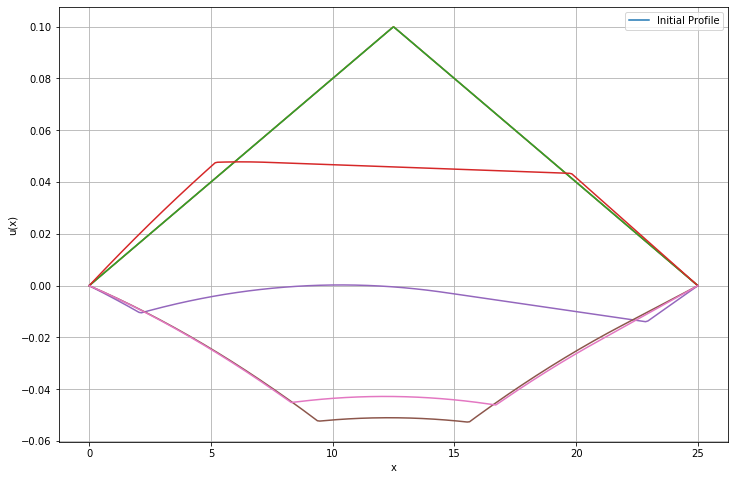

In [9]:
# Initialize variables
l = 25
c = 2500
F = 1000
pi = np.pi

px = 8
Nx = 2**px
x = np.linspace(0, l, Nx+1)

# ID the initial profile
psi = (1 - 2./25*np.abs(x - 25./2))/10

# Create Fourier Series of solution at several time steps
Nt = 5
trange = np.linspace(0, pi/5, Nt)
u = np.zeros([Nx+1,len(trange)+1])

kt = 0
u[:,kt] = psi

NF = 400
for t in trange:
  kt+=1
  for n in range(1, NF+1):
    alpha = n*pi/l
    cn = 2*F*(1 - (-1)**1)/(n*pi)
    bn = 4*np.sin(n*pi/2)/(5*n**2*pi**2)
    c1 = bn - cn/(alpha**2*c**2)
    an = c1*np.cos(alpha*c*t) + cn/(alpha**2*c**2)
    u[:,kt] += an*np.sin(alpha*x)



# Do some plotting
plt.figure(figsize = (12, 8))
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend
plt.plot(x, psi, label='Initial Profile')
plt.plot(x, u)
plt.grid()
plt.legend(loc='upper right')
plt.show()

# Exercise 7.2.1

Consider a metal ring, such as a guiter string, that can be attracted by a magnet. Suppose the string in question is $25cm$ in length, with $c = 2500cm/s$ in the wave equation, its ends are fixed, and it is "plucked" so that its initial displacement is 
\begin{equation}
\phi(x) = \frac{1}{10}(1-\frac{2}{25}|x-\frac{25}{2}|))
\end{equation}
and released (so that it's initial velocity is zero). Suppose further that a magnet does not exterts any constant upward force. We wish to find the motion of the string.

# Solution

Given the IBVP, the solution will be,

$u(x,t) = \sum_{n=1}^{\infty} a_n(t) \phi (x)$

where, $\phi(x) = sin(\alpha_n x)$ and $\alpha_n = \frac{n\pi}{l}$

$\sum_{n=1}^{\infty} c_n(t) \phi_n (x) = 0$

where, $c_n = \frac{(f, \phi_n)}{(\phi_n, \phi_n)}$

and $\psi(x) = \sum_{n=1}^{\infty} b_n \phi_n(x)$

where, $b_n = \frac{(\psi(x), \phi_n)}{(\phi_n, \phi_n)}$

Then $a_n$ satisfies,

\begin{equation}
a_n '' + c^2 * \alpha_n^2 * a_n = c_n(t) \\
a_n(0) = b_n \\
a_n'(0) = d_n
\end{equation}

Then, the solution is

$a_n(t) = b_n cos(\frac{c_n \pi}{l}) t + \frac{l}{c_n \pi} \int_{0}^{t} sin(\frac{c_n\pi}{l} (t -s))c_n \partial s$

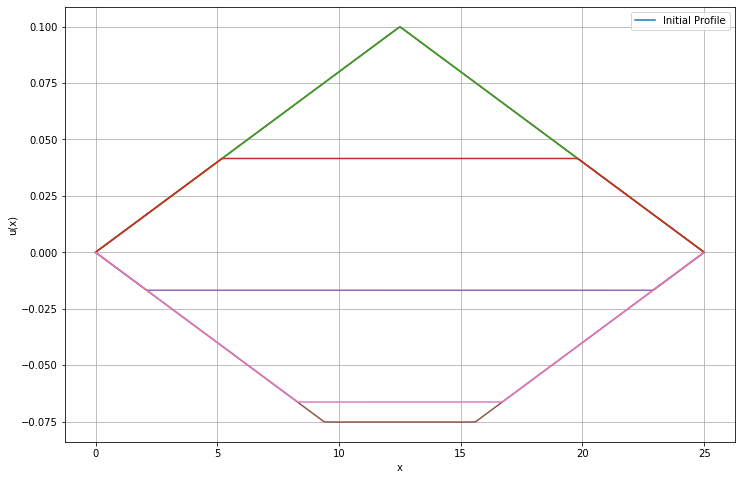

In [10]:
# Initialize variables
l = 25
c = 2500
F = 0
pi = np.pi

px = 8
Nx = 2**px
x = np.linspace(0, l, Nx+1)

# ID the initial profile
psi = (1 - 2./25*np.abs(x - 25./2))/10

# Create Fourier Series of solution at several time steps
Nt = 5
trange = np.linspace(0, pi/5, Nt)
u = np.zeros([Nx+1,len(trange)+1])

kt = 0
u[:,kt] = psi

NF = 400
for t in trange:
  kt+=1
  for n in range(1, NF+1):
    alpha = n*pi/l
    cn = 2*F*(1 - (-1)**1)/(n*pi)
    bn = 4*np.sin(n*pi/2)/(5*n**2*pi**2)
    c1 = bn - cn/(alpha**2*c**2)
    an = c1*np.cos(alpha*c*t) + cn/(alpha**2*c**2)
    u[:,kt] += an*np.sin(alpha*x)



# Do some plotting
plt.figure(figsize = (12, 8))
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend
plt.plot(x, psi, label='Initial Profile')
plt.plot(x, u)
plt.grid()
plt.legend(loc='upper right')
plt.show()

# Exercise 7.2.8b

Consider a string that has one end fixed, with the other end free to move in the vertical direction. Suppose the string is put into motion by virtue of the free end's being manually moved up and down periodically. An IBVP describing this motion is:
\begin{equation}
\frac{\partial^2 u}{\partial t^2} - c^2 \frac{\partial^2 u}{\partial x^2} = 0,  0 < x < l, t > t_0 \\
u(x,t_0) = 0, 0 < x < l, \\
\frac{\partial u}{\partial t}(x,t_0) = 0, 0 < x < l, \\
u(0,t) = 0, t > t_0, \\
u(l,t) = \epsilon sin(2\pi\omega t), t > t_0
\end{equation}

Take $l = 1$, $c = 522$, $t_0 = 0$, and $\epsilon = 10^{-4}$.

a) Solve the IBVP with $\omega$ not equal to a natural frequency of the string. Graph the motion of the string with $\omega$ equal to half the fundamental frequency.

b) Solve the IBVP with $\omega$ equal to a natural frequency of the string. Show that resonance occurs. Graph the motion of the string with $\omega$ equal to the fundamental frequency.

# Solution

Since we have non-homogeneous Boundary Conditions, then

Take; 

$p(x,t) = \epsilon x sin(2 \pi \omega t)$

Where;

$v(x,t) = u(x,t) - p(x,t)$

Note that;

\begin{equation}
\frac{\partial^2 v}{\partial t^2} = \frac{\partial^2 u}{\partial t^2} - \frac{\partial^2 p}{\partial t^2} \\
\end{equation}
\begin{equation}
\frac{\partial^2 v}{\partial x^2} = \frac{\partial^2 u}{\partial x^2}
\end{equation}

So, 

$\frac{\partial^2 v}{\partial t^2} - c^2 \frac{\partial^2 v}{\partial x^2} = \frac{\partial^2 u}{\partial t^2} - c^2 \frac{\partial^2 u}{\partial x^2}  = -x f''(t)$

So, we solve

\begin{equation}
\frac{\partial^2 v}{\partial t^2} - c^2 \frac{\partial^2 v}{\partial x^2} = x * 4*\pi^2 * \epsilon * \omega^2 * sin(2 *  \pi * \omega * t), 0 < x < 1, t > 0\\
v(x,0) = 0, 0 < x < 1, \\
\frac{\partial v}{\partial t}  = -2 * \pi * \omega * \epsilon * x, 0 < x < 1, \\
v(0,t) = 0, t > 0, \\
v(l,0) = 0, t > 0 
\end{equation}

Next, we set 

$v(x,t) = \sum_{n=1}^\infty a_n(t)sin(\alpha_n x)$        

where, $\alpha_n = \frac{n\pi}{l}$

$ x * 4*\pi^2 * \epsilon * \omega^2 * sin(2 *  \pi * \omega * t) = \sum_{n=1}^\infty c_n(t)sin(\alpha_n x)$

where, $c_n(t) =  x * 4*\pi^2 * \epsilon * \omega^2 * sin(2 *  \pi * \omega * t) *\frac{(x, sin(\alpha_n x))}{(sin(\alpha_n x), sin(\alpha_n x))}$

$c_n(t) =  x * 4*\pi^2 * \epsilon * \omega^2 * sin(2 *  \pi * \omega * t) * \frac{\int_{0}^{1} x sin(n \pi) \partial x}{\int_{0}^{1} (sin(n\pi))^2 \partial x}$

$v(x,0) = \sum_{n=1}^{\infty} b_n sin(\alpha_n x)$

where, $b_n = \frac{\int_{0}^{1} x sin(n \pi) \partial x}{\int_{0}^{1} (sin(n\pi))^2 \partial x}$

$\frac{\partial v}{\partial t} = \sum_{n=1}^{\infty} d_n sin(\alpha_n x)$

where, $d_n = -2 * \pi * \omega * \epsilon * \frac{\int_{0}^{1} x sin(n \pi)\, dx}{\int_{0}^{1} (sin(n\pi))^2 \partial x}$

Then $a_n$ satisfies,

\begin{equation}
a_n '' + c^2 * \alpha_n^2 * a_n = c_n(t) \\
a_n(0) = b_n \\
a_n'(0) = d_n
\end{equation}

$a_n(t) = \frac{d_n}{c_n \pi} sin(c_n \pi t) + \frac{1}{c_n \pi} \int_{0}^{t} sin(c_n \pi (t-s))c_n(s) \partial s$

$a_n(t) = \frac{4 * \omega * \epsilon * (-1)^2}{c_n \pi} sin(c_n \pi t) + \frac{8 * \omega^2 * \epsilon * (-1)^{(n+1)}}{c_n^2} \int_{0}^{t} sin(c_n \pi (t-s))c_n(s) \partial s$

Force with $\phi(t) = sin(2\pi \omega t)$

a) If $w \neq \frac{c}{2}$ for all $n$, then

$= \int_{0}^{t} sin(c_n \pi (t-s))c_n(s) sin(2\pi \omega s) \partial s$

$= \frac{2}{\pi(c^2 n^2 - 4\omega^2)}(\frac{c_n}{2} sin(2\pi\omega t) - \omega sin (c_n \pi t)))$

b) If $\omega = \frac{c}{2}$ for some positive integer $n$, then

$= \int_{0}^{t}sin(c_n \pi(t-s))sin(2\pi \omega s) \partial s$

$= \frac{si(c_n \pi t)}{2 c_n \pi} - \frac{t}{2}cos(c_n \pi t)$

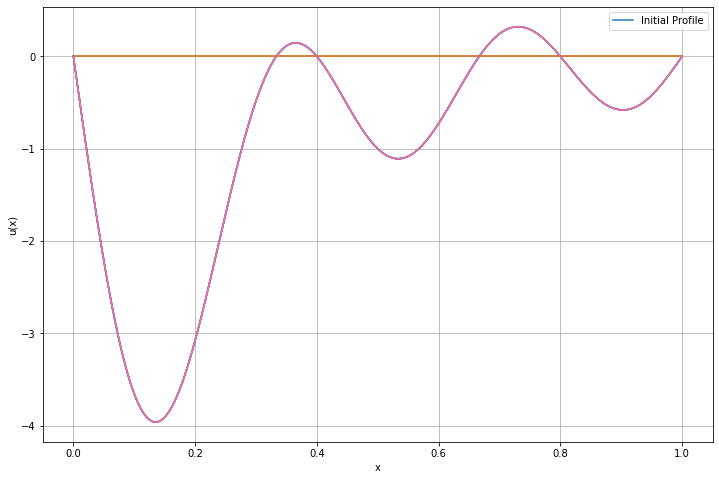

In [11]:
# Initialize variables
l = 1
c = 522
F = 0
w = cn/2
epsilon = 10**-4
pi = np.pi

px = 8
Nx = 2**px
x = np.linspace(0, l, Nx+1)

# ID the initial profile
psi = x*4*pi**2 * epsilon *w**2 *np.sin(2*pi*w)

# Create Fourier Series of solution at several time steps
Nt = 5
trange = np.linspace(0, pi/5, Nt)
u = np.zeros([Nx+1,len(trange)+1])

kt = 0
u[:,kt] = psi

NF = 5
for t in trange:
  kt+=1
  for n in range(1, NF+1):
    alpha = n*pi/l
    cn = ((8*pi*w**2*epsilon*(-1)**(n+1))/n)*np.sin(2*pi*w)
    bn = 0
    dn = (4 * w *epsilon *(-1)**n)/n
    an = (dn/c*n *pi)* np.sin(c*n*pi) + (1/c*n*pi)* (np.sin(c*n*pi*n))/(2*c*n*pi) - np.cos(c*n*pi*n)
    u[:,kt] += an*np.sin(alpha*x)



# Do some plotting
plt.figure(figsize = (12, 8))
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend
plt.plot(x, psi, label='Initial Profile')
plt.plot(x, u)
plt.grid()
plt.legend(loc='upper right')
plt.show()